# Calculating Co2 Emission

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<b>tip :</b> Remove Warnings in the lab</div>

In [106]:
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [43]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-08-09 10:36:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   208KB/s    in 0.3s    

2022-08-09 10:36:43 (208 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [73]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [74]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<div class="alert alert-block alert-info"><b>Info:</b> Showing the chart.</div>

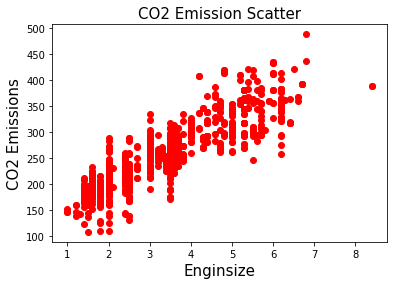

In [69]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red")
plt.title("CO2 Emission Scatter", fontsize=15)
plt.xlabel("Enginsize", fontsize=15)
plt.ylabel("CO2 Emissions", fontsize=15)
plt.show()

## Cleaning Data

In [70]:
cdf.dropna()
# no NaN item

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


## Creating Train & Test data

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
y = cdf[["CO2EMISSIONS"]]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

<div class="alert alert-block alert-info"><b>Info:</b> Showing the chart.</div>

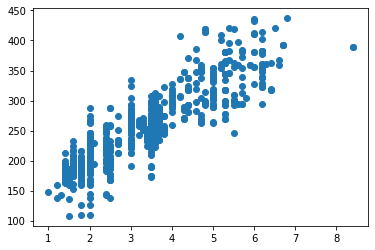

In [80]:
plt.scatter(x_train.ENGINESIZE, y_train)
plt.show()

## Multiple Regression Model

In [81]:
from sklearn import linear_model

In [87]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(regr.coef_)
print(regr.intercept_)

[[11.45488412  7.39585865  9.21155718]]
[67.86918342]


## Testing results

In [103]:
print(regr.score(x_test, y_test))

0.8708148184966767


In [104]:
from sklearn.metrics import r2_score
test_predict = regr.predict(x_test)

print(r2_score(y_test, test_predict))

0.8708148184966767


## Getting input to anticipate CO2EMISSIONS

In [107]:
x1 = float(input('Enter the Enginesize :'))
x2 = float(input('Enter the number of cylinders :'))
x3 = float(input('Enter FUELCONSUMPTION_COMB :'))
print("the car CO2EMISSION will be : ", (regr.intercept_ + (regr.coef_[0][0] * x1) + (regr.coef_[0][1] * x2) + (regr.coef_[0][2] * x3)))

Enter the Enginesize :2
Enter the number of cylinders :5
Enter FUELCONSUMPTION_COMB :2
the car CO2EMISSION will be :  [146.18135926]
